In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

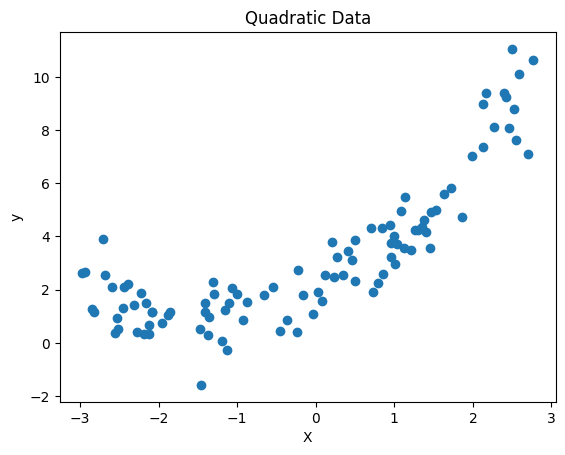

In [2]:
# quadratic equation = ax2 + bx + c

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1) # quadratic equation used y = 0.5X^2 + 1.5X + 2+outliers

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Quadratic Data')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
## Lets implement simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [5]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lin_reg.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  1.181788284482511
Mean Squared Error:  2.483647277368189
R2 Score:  0.6126940374722901


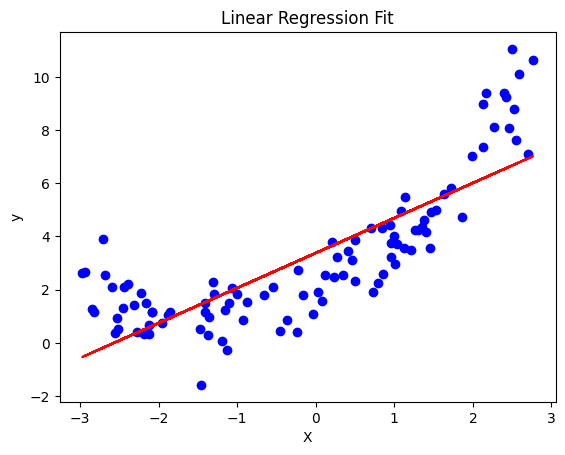

In [8]:
## lets visualize the above model
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red') # regression line
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()

In [9]:
## Lets apply poynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test) 

In [10]:
X_train_poly

array([[ 1.00000000e+00,  1.40765626e+00,  1.98149614e+00],
       [ 1.00000000e+00,  3.38157009e-02,  1.14350162e-03],
       [ 1.00000000e+00,  8.40185422e-01,  7.05911543e-01],
       [ 1.00000000e+00,  1.12875010e+00,  1.27407679e+00],
       [ 1.00000000e+00, -9.28654502e-01,  8.62399184e-01],
       [ 1.00000000e+00, -2.82475438e+00,  7.97923730e+00],
       [ 1.00000000e+00,  3.45693198e-01,  1.19503787e-01],
       [ 1.00000000e+00,  2.59011049e+00,  6.70867235e+00],
       [ 1.00000000e+00, -1.35973096e+00,  1.84886828e+00],
       [ 1.00000000e+00,  5.01185563e-01,  2.51186969e-01],
       [ 1.00000000e+00, -1.41314431e+00,  1.99697685e+00],
       [ 1.00000000e+00, -2.43491063e+00,  5.92878976e+00],
       [ 1.00000000e+00,  2.52559851e+00,  6.37864781e+00],
       [ 1.00000000e+00, -1.19149526e+00,  1.41966096e+00],
       [ 1.00000000e+00,  1.29597407e+00,  1.67954880e+00],
       [ 1.00000000e+00, -1.30965783e+00,  1.71520362e+00],
       [ 1.00000000e+00,  2.41635919e+00

In [11]:
#include bias parameter adds a column of ones to the feature matrix to account for the intercept term in the polynomial regression model.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
print("Mean Absolute Error (Polynomial): ", mean_absolute_error(y_test, y_pred_poly))
print("Mean Squared Error (Polynomial): ", mean_squared_error(y_test, y_pred_poly))
print("R2 Score (Polynomial): ", r2_score(y_test, y_pred_poly))

Mean Absolute Error (Polynomial):  0.7452267176667616
Mean Squared Error (Polynomial):  0.8915142823660067
R2 Score (Polynomial):  0.8609751068980882


In [14]:
print(lin_reg.intercept_, lin_reg.coef_) # for simple linear regression
print(poly_reg.intercept_, poly_reg.coef_) # for polynomial regression

[3.37793526] [[1.3172279]]
[1.84929594] [[0.         1.47483128 0.53425233]]


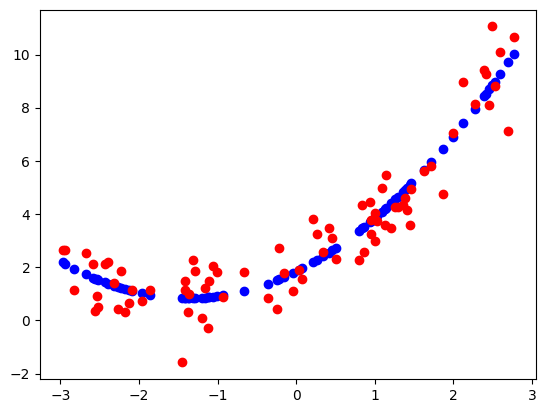

In [17]:
# plot the polynomial regression
plt.scatter(X_train, poly_reg.predict(X_train_poly), color='blue')
plt.scatter(X_train, y_train, color='red')

In [22]:
## Lets apply poynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test) 

In [23]:
#include bias parameter adds a column of ones to the feature matrix to account for the intercept term in the polynomial regression model.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
print("Mean Absolute Error (Polynomial): ", mean_absolute_error(y_test, y_pred_poly))
print("Mean Squared Error (Polynomial): ", mean_squared_error(y_test, y_pred_poly))
print("R2 Score (Polynomial): ", r2_score(y_test, y_pred_poly))

Mean Absolute Error (Polynomial):  0.7417848406881401
Mean Squared Error (Polynomial):  0.9215069345474953
R2 Score (Polynomial):  0.856297980186996


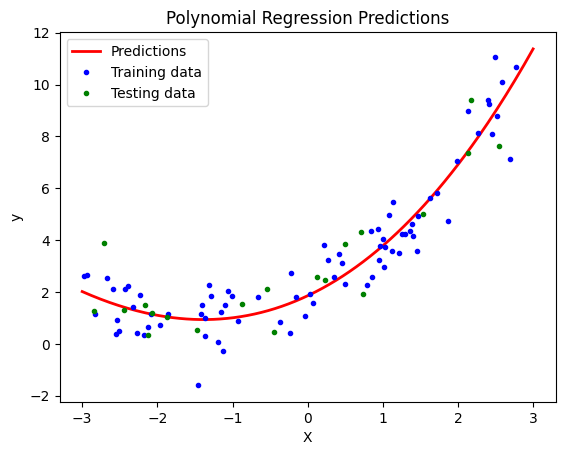

In [24]:
# prediction for new data point
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "-r", label="Predictions",linewidth=2)
plt.plot(X_train,y_train,"b.",label="Training data")
plt.plot(X_test,y_test,"g.",label="Testing data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()

## Pipeline Concepts

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
def polynomial_regression_pipeline(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    pipeline = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred_new = pipeline.predict(X_new)

    # plotting prediction line
    plt.plot(X_new, y_pred_new, "r", label="Degree " + str(degree),linewidth=2)
    plt.plot(X_train,y_train,"b.",label="Training data", linewidth=2)
    plt.plot(X_test,y_test,"g.",label="Testing data", linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.title(f"Polynomial Regression Predictions (degree={degree})")
    plt.legend()
    plt.show() 

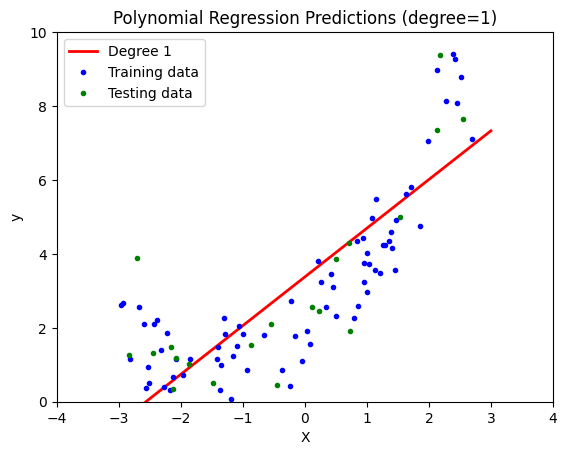

In [27]:
polynomial_regression_pipeline(1)

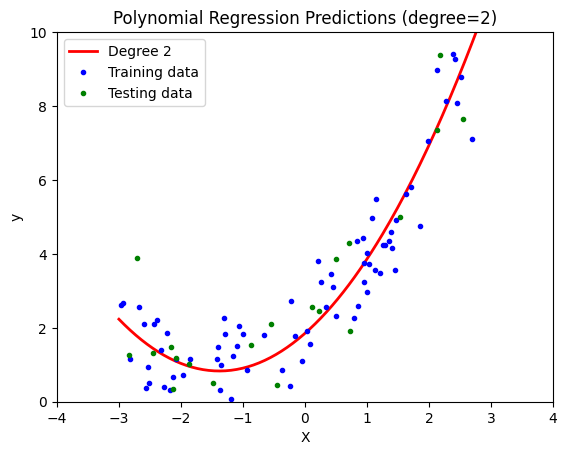

In [28]:
polynomial_regression_pipeline(2)

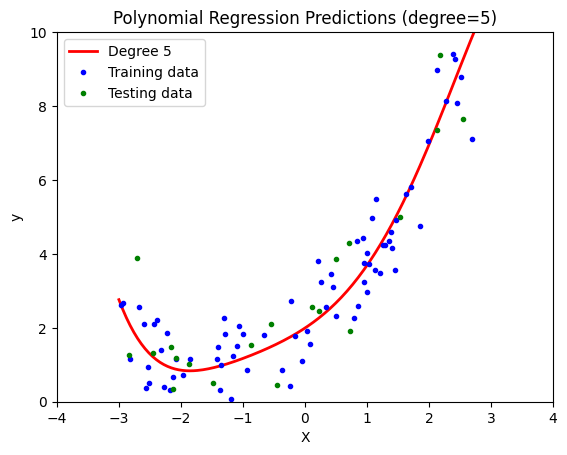

In [29]:
polynomial_regression_pipeline(5)

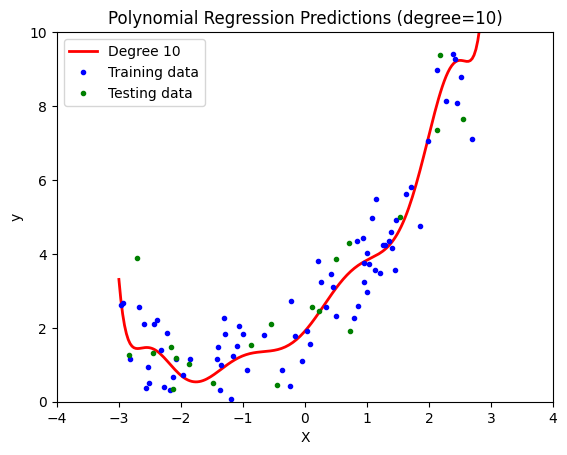

In [30]:
polynomial_regression_pipeline(10)

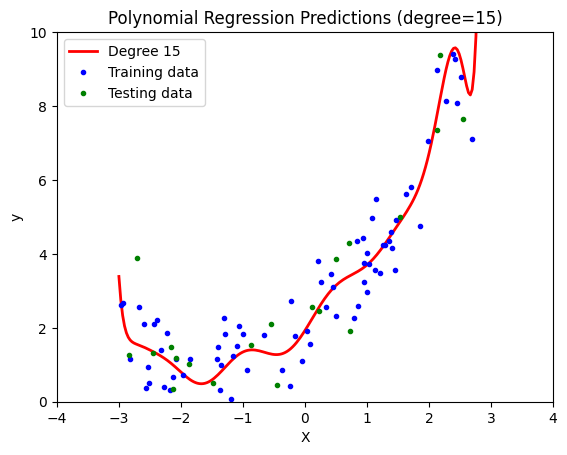

In [31]:
polynomial_regression_pipeline(15)

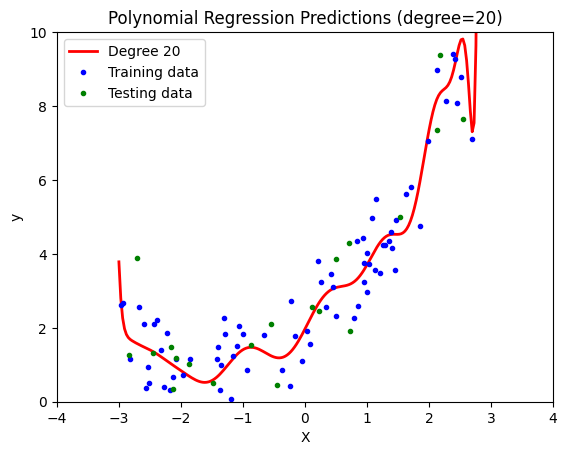

In [36]:
polynomial_regression_pipeline(20)